# Phân tích dữ liệu _ Bệnh đái tháo đường

## 1. Tổng quan Dữ liệu và Lấy Dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file diabetes.csv
df = pd.read_csv('diabetes.csv')

# Hiển thị 5 dòng đầu tiên của dữ liệu để kiểm tra
print(df.head())

# Kiểm tra thông tin tóm tắt của bộ dữ liệu
print(df.info())

# Thống kê mô tả
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

## 2. Phân tích Khám phá Dữ liệu và Trực quan hóa

### Phân tích Tỷ lệ mắc bệnh

Phân bố kết quả chẩn đoán (Số lượng):
Outcome
0    500
1    268
Name: count, dtype: int64

Phân bố kết quả chẩn đoán (Tỷ lệ phần trăm):
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_1628\3183136386.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis') # Sử dụng countplot của seaborn


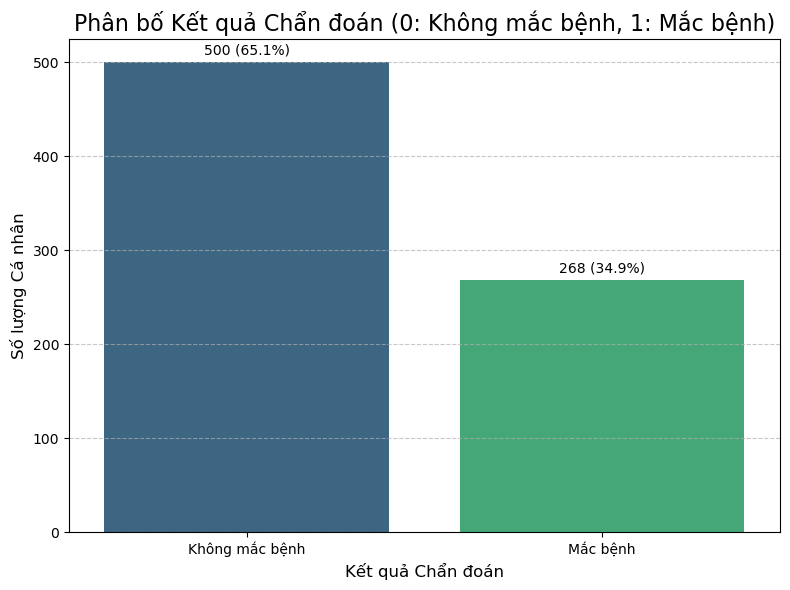

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đếm số lượng người mắc và không mắc bệnh
outcome_counts = df['Outcome'].value_counts()

# 2. Tính tỷ lệ phần trăm
outcome_proportions = df['Outcome'].value_counts(normalize=True) * 100

print("Phân bố kết quả chẩn đoán (Số lượng):")
print(outcome_counts)
print("\nPhân bố kết quả chẩn đoán (Tỷ lệ phần trăm):")
print(outcome_proportions)

# 3. Vẽ biểu đồ thanh
plt.figure(figsize=(8, 6)) # Kích thước biểu đồ
sns.countplot(x='Outcome', data=df, palette='viridis') # Sử dụng countplot của seaborn
plt.title('Phân bố Kết quả Chẩn đoán (0: Không mắc bệnh, 1: Mắc bệnh)', fontsize=16) # Tiêu đề biểu đồ
plt.xlabel('Kết quả Chẩn đoán', fontsize=12) # Nhãn trục x
plt.ylabel('Số lượng Cá nhân', fontsize=12) # Nhãn trục y
plt.xticks([0, 1], ['Không mắc bệnh', 'Mắc bệnh'], fontsize=10) # Đặt lại nhãn trục x
plt.yticks(fontsize=10) # Cỡ chữ trục y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Thêm lưới cho trục y

# Thêm giá trị số lượng và phần trăm lên trên các cột
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 5,    # Vị trí văn bản
                   f'{int(height)} ({height/len(df)*100:.1f}%)', # Nội dung văn bản
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Đảm bảo bố cục gọn gàng
plt.show()

### Phân tích Mối tương quan giữa các biến
Để hiểu các mối quan hệ giữa các biến, chúng ta có thể sử dụng biểu đồ heatmap của ma trận tương quan.

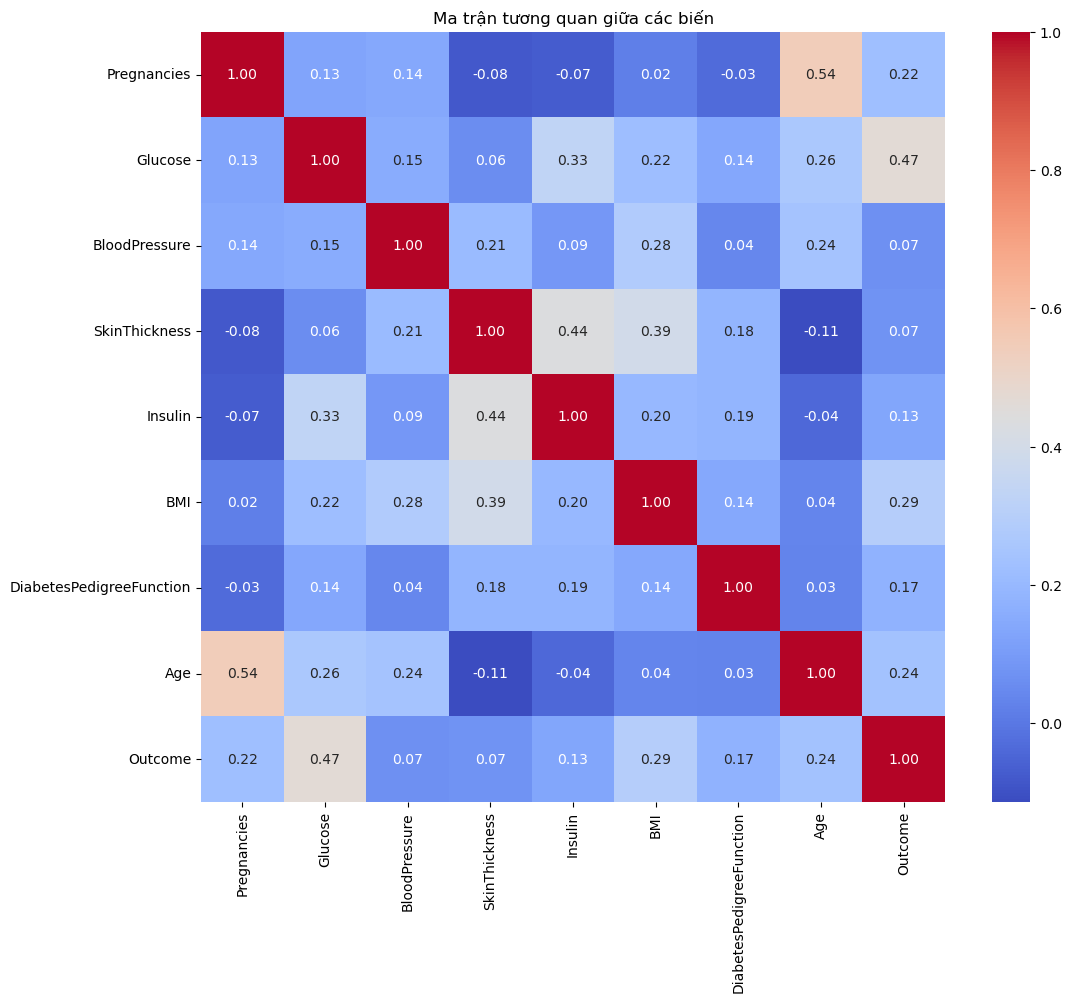

In [4]:
# Tính ma trận tương quan
corr_matrix = df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến')
plt.show()

## Phân tích đơn biến
### Phân tích theo các yếu tố rủi ro chính (Glucose, BMI, Age)

C:\Users\User\AppData\Local\Temp\ipykernel_1628\644069238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='GnBu')


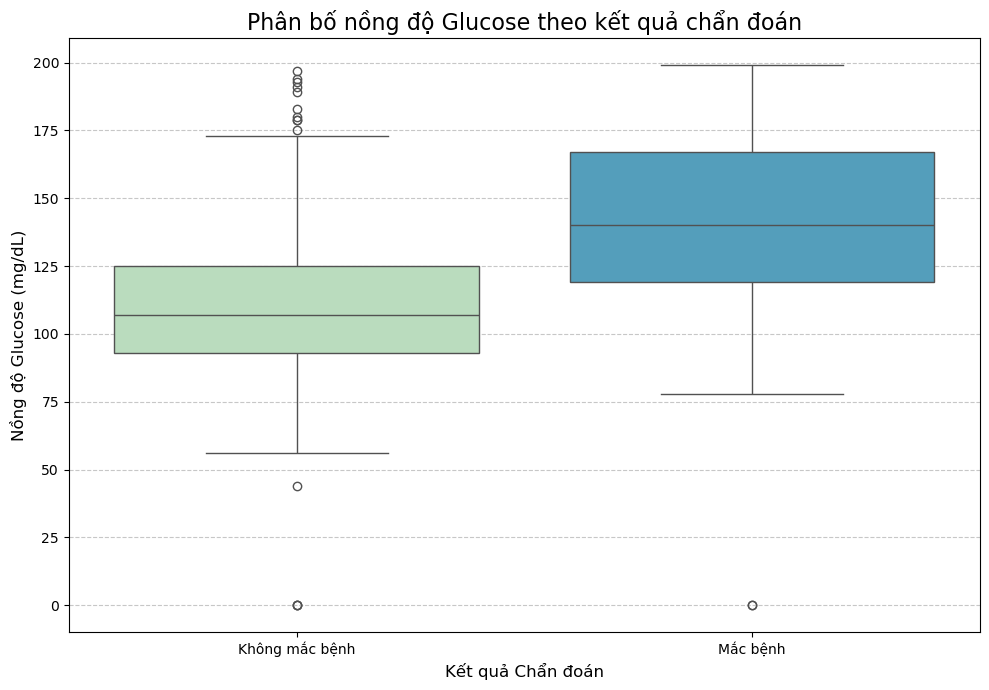

C:\Users\User\AppData\Local\Temp\ipykernel_1628\644069238.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='RdPu')


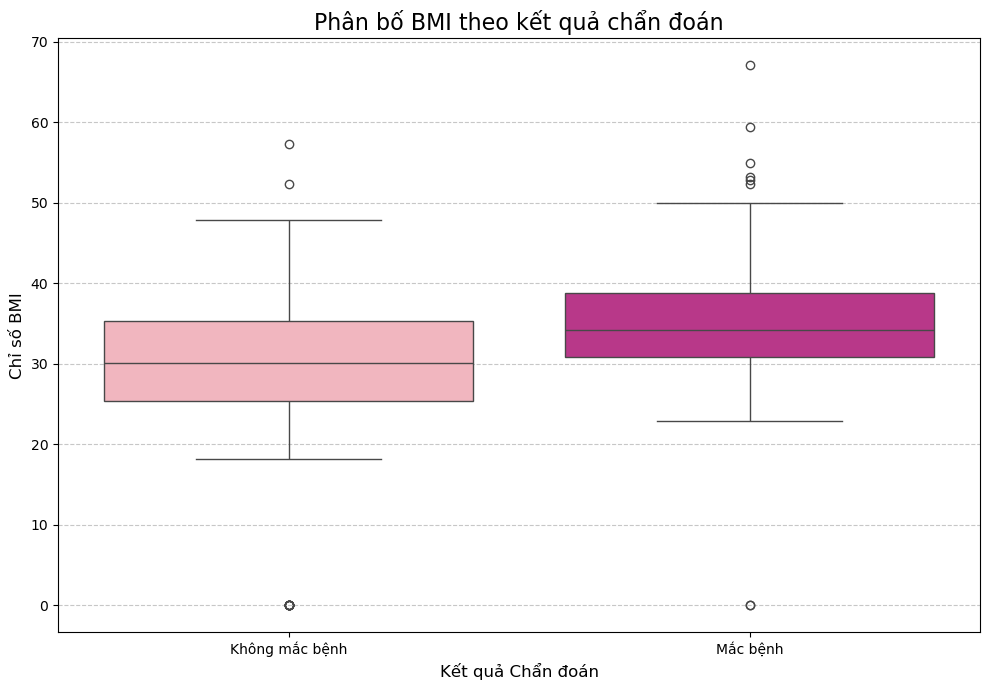

C:\Users\User\AppData\Local\Temp\ipykernel_1628\644069238.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=df, palette='Blues')


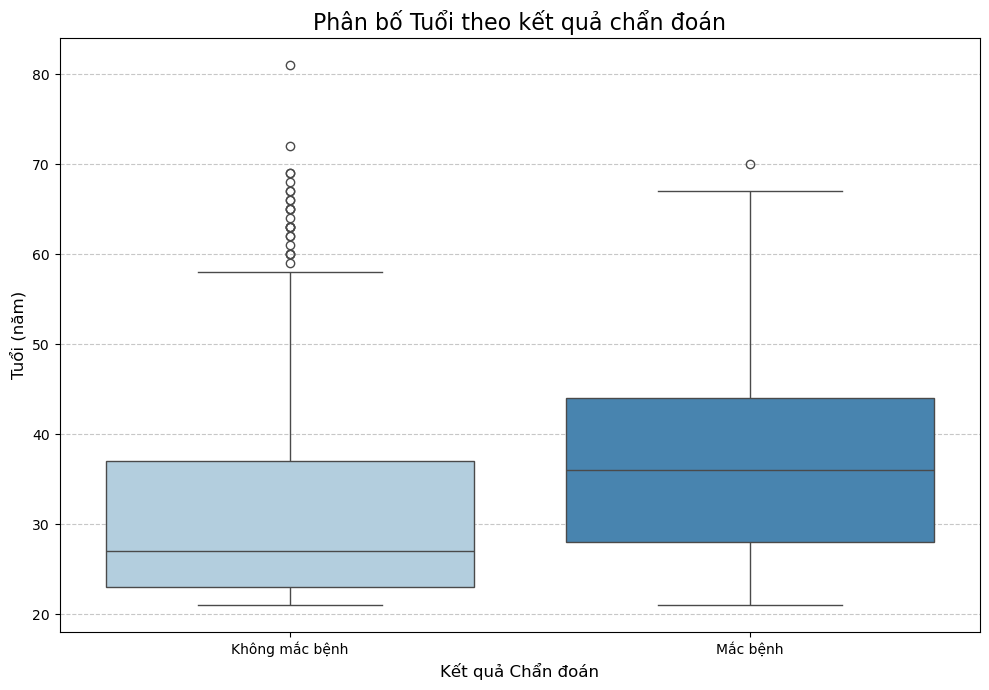

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Code cho Slide 9: Phân bố Glucose theo Chẩn đoán ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='GnBu')
plt.title('Phân bố nồng độ Glucose theo kết quả chẩn đoán', fontsize=16)
plt.xlabel('Kết quả Chẩn đoán', fontsize=12)
plt.ylabel('Nồng độ Glucose (mg/dL)', fontsize=12)
plt.xticks([0, 1], ['Không mắc bệnh', 'Mắc bệnh'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Code cho Slide 10: Phân bố BMI theo Chẩn đoán ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Outcome', y='BMI', data=df, palette='RdPu')
plt.title('Phân bố BMI theo kết quả chẩn đoán', fontsize=16)
plt.xlabel('Kết quả Chẩn đoán', fontsize=12)
plt.ylabel('Chỉ số BMI', fontsize=12)
plt.xticks([0, 1], ['Không mắc bệnh', 'Mắc bệnh'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Code cho Slide 11: Phân bố Tuổi theo Chẩn đoán ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Outcome', y='Age', data=df, palette='Blues')
plt.title('Phân bố Tuổi theo kết quả chẩn đoán', fontsize=16)
plt.xlabel('Kết quả Chẩn đoán', fontsize=12)
plt.ylabel('Tuổi (năm)', fontsize=12)
plt.xticks([0, 1], ['Không mắc bệnh', 'Mắc bệnh'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## EDA - Phân tích theo tiêu chuẩn WHO (Glucose)

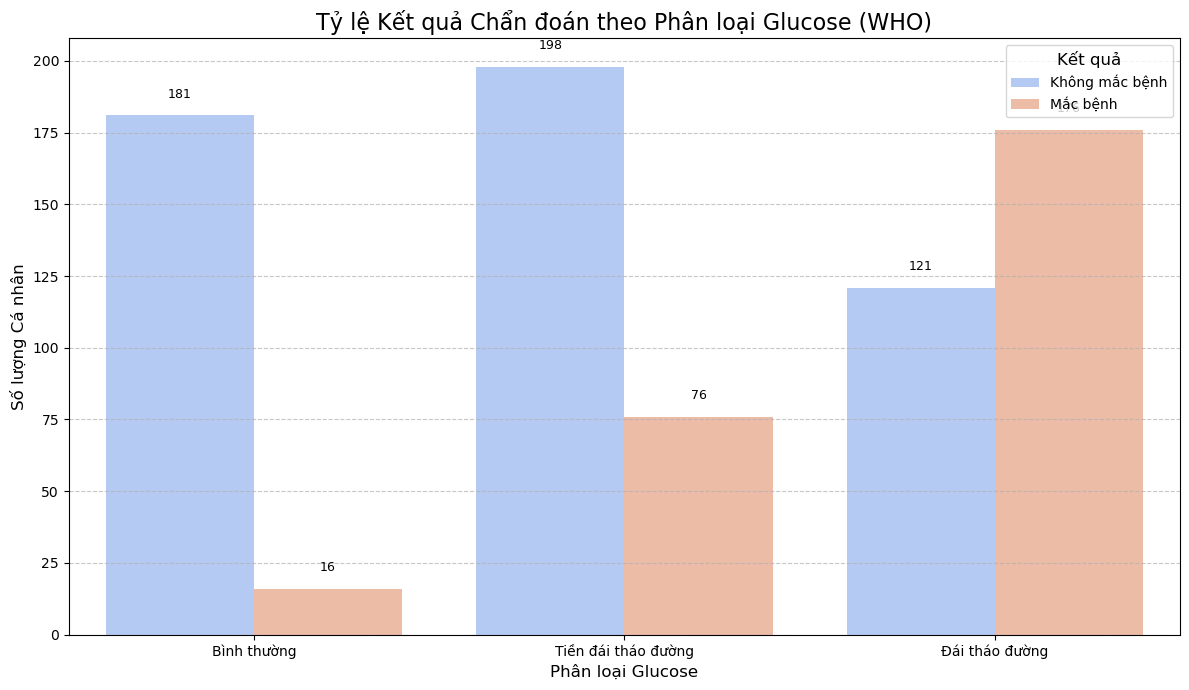

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def classify_glucose(glucose):
    if glucose < 100:
         return 'Bình thường'
    elif 100 <= glucose <= 125:
         return 'Tiền đái tháo đường'
    else:
         return 'Đái tháo đường' 
df['Glucose_Classification'] = df['Glucose'].apply(classify_glucose)


# --- Code cho Slide 12: Phân loại Glucose theo tiêu chuẩn WHO ---
plt.figure(figsize=(12, 7))
sns.countplot(x='Glucose_Classification', hue='Outcome', data=df,
              order=['Bình thường', 'Tiền đái tháo đường', 'Đái tháo đường'],
              palette='coolwarm') # Sắp xếp thứ tự và chọn bảng màu
plt.title('Tỷ lệ Kết quả Chẩn đoán theo Phân loại Glucose (WHO)', fontsize=16)
plt.xlabel('Phân loại Glucose', fontsize=12)
plt.ylabel('Số lượng Cá nhân', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Kết quả', labels=['Không mắc bệnh', 'Mắc bệnh'], fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị số lượng lên trên các cột (tùy chọn)
for container in plt.gca().containers:
    for p in container.patches:
        height = p.get_height()
        if height > 0: # Chỉ hiển thị cho cột có giá trị
            plt.gca().text(p.get_x() + p.get_width() / 2, height + 5,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Nguồn tài liệu

Pima Indians Diabetes Database

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

# Kết thúc
